In [1]:
from src import *

In [2]:
empty_folder(ANC_PATH)
start_video_capture(awaited_capture=10)

Starting video capture
Keys are:
- R to refresh
- A to collect anchor
- P to collect positive
- Q to quit.
A key pressed : Anchor collected
A key pressed : Anchor collected
A key pressed : Anchor collected
A key pressed : Anchor collected
A key pressed : Anchor collected
A key pressed : Anchor collected
A key pressed : Anchor collected
A key pressed : Anchor collected
A key pressed : Anchor collected
A key pressed : Anchor collected
Video capture stopped successfully. Took 10 new anchor.


In [3]:
max_harvest = 20
# embedding_pretrained = make_embedding_from_pretrained(file_name='embedding_kernel_Georgeless')
# siamese_model = make_siamese_model(embedding_pretrained)
siamese_model = make_siamese_model(make_embedding())
empty_folder(VANC_PATH)
empty_folder(POS_PATH)
train_step = define_train_step(siamese_model)
train = define_training_loop(siamese_model, train_step)
print(f"Successfully created siamese model from pretrained kernel.")
copy_folder(ANC_PATH, VANC_PATH)
data_augment_from_folder(ANC_PATH, VANC_PATH, data_augmentation_factor=3)
data_augment_from_folder(ANC_PATH, POS_PATH, data_augmentation_factor=4)
data = harvest_from_folder(anc_path=VANC_PATH, pos_path=POS_PATH, neg_path=NEG_PATH, n_harvest = 2*max_harvest)
train_data, test_data = build_dataloader_pipeline(data, max_data_size = 2*max_harvest)

Successfully created siamese model from pretrained kernel.
Preparing data augmentation from data\anchor to data\var_anchor.


100%|██████████| 10/10 [00:00<00:00, 30.06it/s]


Successfully generated 30 new images through data augmentation.
Preparing data augmentation from data\anchor to data\positive.


100%|██████████| 10/10 [00:00<00:00, 10.39it/s]


Successfully generated 40 new images through data augmentation.
Harvesting data from anchor data\var_anchor, positive data\positive and negative data\negative folder.
Anchor images availlable :	40
Positive images availlable :	40
Negative images availlable :	13233
Tuple harvested :		40
Labelling data
Successfully harvested and labelled 40 data.


In [4]:
print(f"Begining transfert learning.")
train(train_data, n_epoch=2)
print(f"Transfert training complete, saving transfered siamese model.")

Begining transfert learning.
Epoch 1/2
2/2 [==============================] - 34s 14s/step
Loss : 0.6838126182556152	Recall : 0.4285714328289032	Precision : 1.0
Epoch 2/2
2/2 [==============================] - 34s 16s/step
Loss : 0.6286670565605164	Recall : 0.38461539149284363	Precision : 1.0
Transfert training complete, saving transfered siamese model.


In [5]:
VERIFICATION_THRESHOLD = 0.44

In [6]:
k,m = 0,0

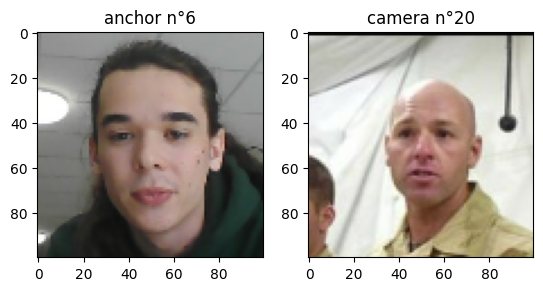

[Single verification] Gross result : 0.4245121479034424	Validation : False
Verifying 10 data.
[Multiple verification] Gross result : 0.43694356083869934	Validation : False


In [12]:
anc_path = r'C:\Users\xafra\Documents\2A\Cassiopée\git project\RFTL2\data\anchor'
ver_path = r'C:\Users\xafra\Documents\2A\Cassiopée\git project\RFTL2\data\verification_demo'
k+=1
m-=1
k %= len(os.listdir(anc_path))
m %= len(os.listdir(ver_path))

#   preprocess
anchor_file_path = os.path.join(anc_path, os.listdir(anc_path)[k])
verify_file_path = os.path.join(ver_path, os.listdir(ver_path)[m])
test_input = np.array(preprocess(anchor_file_path))
test_val = np.array(preprocess(verify_file_path))

#   Display pictures and print results
plot_images_b2b(test_input, test_val, title1=f"anchor n°{k}", title2=f"camera n°{m}")

result = siamese_model.predict([np.array([test_input]), np.array([test_val])])
print(f"[Single verification] Gross result : {np.mean(result)}\tValidation : {np.mean(result) > VERIFICATION_THRESHOLD}")
quartile_result = verify(siamese_model, verify_file_path, anc_path)
print(f"[Multiple verification] Gross result : {quartile_result}\tValidation : {quartile_result > VERIFICATION_THRESHOLD}")